In [52]:
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_extraction.text import CountVectorizer

from typing import Iterable


In [53]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from typing import Iterable

def string_preparation(st: str) -> str:
    return st.replace('(',' ')\
             .replace(')',' ')\
             .strip()\
             .replace(' ','_')\
             .replace('__','_')

# for processing strings
def row_to_string(row: Iterable[str]) -> str:
    return ' '.join(row.values)

df = pd.read_csv('dataset.csv', delimiter=",")

# Use apply and map to replace deprecated applymap
df_new = df.drop('Disease', axis=1).fillna('')
for col in df_new.columns:
    df_new[col] = df_new[col].map(string_preparation)

simptoms_list = df_new.apply(row_to_string, axis=1).values.tolist()

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(simptoms_list)

my_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
symptoms_list = vectorizer.get_feature_names_out()

my_df["Disease"] = df["Disease"].map(str.strip)
# we have received data that we can feed to the ML algorithm
print(my_df.shape)


(4920, 132)


In [54]:
!pip install pyspellchecker

import re
from spellchecker import SpellChecker

# Create an instance of SpellChecker outside the loop to avoid repeated initialization
spell = SpellChecker()

# Define a set of correct words to speed up lookups using 'in' operator
correct_words = {"GERD", "cholestasis", "spondylosis", "Gastroenteritis", "Hyperthyroidism", "Hypothyroidism"}

for dis in my_df["Disease"].unique():
    words = re.split(pattern=r'[\s()]+', string=dis)
    for word in words:
        # Check if the word needs to be spell-checked
        if len(word) > 1 and word.lower() not in correct_words:
            # Get the corrected version of the word
            corrected_word = spell.correction(word)
            if corrected_word != word:
                print("word:", word)
                print("corrected:", corrected_word)
                print("disease:", dis)

word: GERD
corrected: herd
disease: GERD
word: diseae
corrected: disease
disease: Peptic ulcer diseae
word: hemmorhoids
corrected: hemorrhoids
disease: Dimorphic hemmorhoids(piles)
word: Osteoarthristis
corrected: osteoarthritis
disease: Osteoarthristis
word: Paroymsal
corrected: paroxysmal
disease: (vertigo) Paroymsal  Positional Vertigo


In [55]:
# Dictionary containing misspelled disease names as keys and their correct spellings as values
errors_dict = {
    'Peptic ulcer diseae': 'Peptic ulcer disease',
    'Dimorphic hemmorhoids(piles)': 'Dimorphic hemorrhoids (piles)',
    'Osteoarthristis': 'Osteoarthritis',
    '(vertigo) Paroymsal  Positional Vertigo': '(vertigo) Paroxysmal  Positional Vertigo'
}

def correct_disease_name(disease):
    return errors_dict.get(disease, disease)

# Apply the function to the 'Disease' column to correct the names
my_df['Disease'] = my_df['Disease'].apply(correct_disease_name)

# Now, the 'Disease' column in the DataFrame contains the corrected disease names.


In [56]:
for sym in my_df.columns:
    for word in sym.split('_'):
        if word not in ["", "diarrhoea", 'polyuria', 'sensorium', 'breathlessness',
                       'micturition', 'mucoid', 'unsterile', 'unsteadiness']\
        and spell.correction(word)!=word:
            print (word)
            print(spell.correction(word))
            print ("sym*   ", sym)



feets
feels
sym*    cold_hands_and_feets
dischromic
dichromic
sym*    dischromic_patches
scurring
scarring
sym*    scurring
extremeties
extremities
sym*    swollen_extremeties
typhos
typhus
sym*    toxic_look_typhos


In [57]:
symptoms_errors_dict = {
    'cold_hands_and_feets': 'cold_hands_and_feet',
    'dischromic_patches': 'dyschromic_patches',
    'scurring': 'scarring',
    'swollen_extremeties': 'swollen_extremities',
    'toxic_look_typhos':'toxic_look_typhus'
}
def symptom_prep(symptom):
    if symptom in symptoms_errors_dict:
         return symptoms_errors_dict[symptom]
    return symptom
my_df.columns=my_df.columns.map(symptom_prep)


In [58]:
for sym in my_df.columns:
    for word in sym.split('_'):
        if word not in ["", "diarrhoea", 'polyuria', 'sensorium', 'breathlessness',
                       'micturition', 'mucoid', 'unsterile', 'unsteadiness', 'dyschromic']\
        and spell.correction(word)!=word:
            print (word)
            print(spell.correction(word))
            print ("sym*   ", sym)

In [59]:
my_df.groupby('Disease').Disease.count()

Disease
(vertigo) Paroxysmal  Positional Vertigo    120
AIDS                                        120
Acne                                        120
Alcoholic hepatitis                         120
Allergy                                     120
Arthritis                                   120
Bronchial Asthma                            120
Cervical spondylosis                        120
Chicken pox                                 120
Chronic cholestasis                         120
Common Cold                                 120
Dengue                                      120
Diabetes                                    120
Dimorphic hemorrhoids (piles)               120
Drug Reaction                               120
Fungal infection                            120
GERD                                        120
Gastroenteritis                             120
Heart attack                                120
Hepatitis B                                 120
Hepatitis C                     

In [60]:
# Let's look for duplicates
my_df[my_df.duplicated ()].shape


(4616, 132)

In [61]:
df_drop_dup = my_df.drop_duplicates()
print(f' without duplicated shape  {df_drop_dup.shape}')
df_drop_dup.groupby('Disease').Disease.count().sort_values()


 without duplicated shape  (304, 132)


Disease
Gastroenteritis                              5
AIDS                                         5
Acne                                         5
Urinary tract infection                      5
Allergy                                      5
Fungal infection                             5
Heart attack                                 5
Paralysis (brain hemorrhage)                 5
Arthritis                                    6
Cervical spondylosis                         6
Drug Reaction                                6
Impetigo                                     6
Hypertension                                 6
Dimorphic hemorrhoids (piles)                6
(vertigo) Paroxysmal  Positional Vertigo     7
Psoriasis                                    7
Osteoarthritis                               7
Peptic ulcer disease                         7
Hepatitis C                                  7
Bronchial Asthma                             7
GERD                                         7
Malar

In [62]:
import os

# Path where you want to save the file
directory = 'C:/Users/dhrum/Desktop/ADT_solution/content'
os.makedirs(directory, exist_ok=True)  # Creates the directory if it does not exist

# Full file path
file_path = os.path.join(directory, 'my_dataset_small.csv')

try:
    df_drop_dup.to_csv(file_path, index=False)
    print(f"DataFrame saved successfully at {file_path}.")
except Exception as e:
    print(f"An error occurred: {e}")


DataFrame saved successfully at C:/Users/dhrum/Desktop/ADT_solution/content\my_dataset_small.csv.


In [63]:
MY_PATH = '/Users/dhrum/Desktop/ADT_solution/'


In [64]:
severity = pd.read_csv(f'{MY_PATH}Symptom-severity.csv').sort_values('Symptom', ascending=True)
# processing
severity["Symptom"] = severity["Symptom"].map(string_preparation)
severity["Symptom"] = severity["Symptom"].map(symptom_prep)
severity


,Symptom,weight
39,abdominal_pain,4
101,abnormal_menstruation,6
8,acidity,3
44,acute_liver_failure,6
98,altered_sensorium,2
...,...,...
19,weight_loss,3
131,yellow_crust_ooze,3
42,yellow_urine,4
43,yellowing_of_eyes,4


In [65]:
# error search
sym_list = df_drop_dup.columns
for sym in sym_list:
    if sym not in severity.Symptom.values:
        print (sym)


foul_smell_of_urine
Disease


In [66]:
for sym in severity.Symptom.values:
    if sym not in sym_list:
        print (sym)

severity.loc[severity['Symptom']=='foul_smell_ofurine', 'Symptom']='foul_smell_of_urine'
for sym in sym_list:
    if sym not in severity.Symptom.values:
        print (sym)


foul_smell_ofurine
prognosis
Disease


In [67]:
severity.to_csv(f'{MY_PATH}my_Symptom_severity.csv', index=False)


In [68]:
descriptions = pd.read_csv(f'{MY_PATH}symptom_Description.csv')
descriptions["Disease"] = descriptions["Disease"].map(str.strip)
descriptions["Disease"] = descriptions["Disease"].map(correct_disease_name)
descriptions.head()


,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [69]:
for dis in df_drop_dup['Disease'].unique():
    if dis not in descriptions['Disease'].values:
        print (dis)


Dimorphic hemorrhoids (piles)


In [70]:
# # matching search in descriptions
for dis in descriptions['Disease'].unique():
    if dis not in df_drop_dup['Disease'].values:
        print (dis)


Dimorphic hemorrhoids(piles)


In [71]:
# reduction to one view
descriptions.loc[descriptions["Disease"] == 'Dimorphic hemorrhoids(piles)', "Disease"] = 'Dimorphic hemorrhoids (piles)'
for dis in df_drop_dup['Disease'].unique():
    if dis not in descriptions['Disease'].values:
        print (dis)


In [72]:
import pandas as pd

# Create the new row as a DataFrame
new_row_df = pd.DataFrame([{"Disease": 'Not identified. Perhaps you are healthy.',
                            'Description': "I can't identify the disease by these symptoms..."
                                            " Perhaps you are healthy... or you are still underexamined..."}])

# Append the new row using pd.concat
descriptions = pd.concat([descriptions, new_row_df], ignore_index=True)

# Display the last few rows of the DataFrame to verify
print(descriptions.tail())

                                     Disease  \
37                                 Pneumonia   
38                                 Arthritis   
39                           Gastroenteritis   
40                              Tuberculosis   
41  Not identified. Perhaps you are healthy.   

                                          Description  
37  Pneumonia is an infection in one or both lungs...  
38  Arthritis is the swelling and tenderness of on...  
39  Gastroenteritis is an inflammation of the dige...  
40  Tuberculosis (TB) is an infectious disease usu...  
41  I can't identify the disease by these symptoms...  


In [73]:
descriptions.to_csv(f'{MY_PATH}my_symptom_Description.csv', index=False)


In [74]:
# precautions for the disease
precautions = pd.read_csv(f'{MY_PATH}symptom_precaution.csv')
precautions["Disease"] = precautions["Disease"].map(str.strip)
precautions["Disease"] = precautions["Disease"].map(correct_disease_name)
for dis in df_drop_dup['Disease'].unique():
    if dis not in precautions['Disease'].values:
        print (dis)


In [75]:
import pandas as pd

# Create the new row as a DataFrame
new_row_df = pd.DataFrame([{"Disease": 'Not identified. Perhaps you are healthy.',
                            'Precaution_1': "Enjoy your life!",
                            'Precaution_2': "Enjoy your life!!",
                            'Precaution_3': "Enjoy your life!!!",
                            'Precaution_4': "But do not forget about regular medical examination"}])

# Append the new row using pd.concat
precautions = pd.concat([precautions, new_row_df], ignore_index=True)

# Display the last few rows of the DataFrame to verify
print(precautions.tail())


                                     Disease  \
37                                 Pneumonia   
38                                 Arthritis   
39                           Gastroenteritis   
40                              Tuberculosis   
41  Not identified. Perhaps you are healthy.   

                        Precaution_1                    Precaution_2  \
37                    consult doctor                      medication   
38                          exercise        use hot and cold therapy   
39  stop eating solid food for while  try taking small sips of water   
40                       cover mouth                  consult doctor   
41                  Enjoy your life!               Enjoy your life!!   

          Precaution_3                                       Precaution_4  
37                rest                                          follow up  
38     try acupuncture                                            massage  
39                rest                            

In [76]:
precautions.to_csv(f'{MY_PATH}my_symptom_precaution.csv', index=False)


In [77]:
# # in grouped Data we get all possible symptoms for each
# diseases (not variants of sets, but the maximum set)
groupedData = df_drop_dup.groupby(df_drop_dup['Disease']).max()
#  и тож сохраним , save
groupedData.to_csv(f'{MY_PATH}my_symptoms_of_diseases.csv')


In [78]:
groupedData


,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
Disease,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroxysmal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
AIDS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acne,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Alcoholic hepatitis,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
Allergy,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Arthritis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bronchial Asthma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cervical spondylosis,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Chicken pox,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Training the model


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [80]:
clf = SVC(probability=True, random_state=11)
clf.fit(my_df.drop("Disease", axis=1), my_df["Disease"])
y=clf.predict_proba(X=my_df.loc[[30]].drop('Disease', axis=1))
# checking the answer and the predicterd answer for any row
print(my_df.loc[30, "Disease"])
df_diagnoses = pd.DataFrame({
    'Diagnosis': clf.classes_,
    'Probability': y[0]
}).sort_values('Probability', ascending=False )
df_diagnoses=df_diagnoses.reset_index(drop=True)
df_diagnoses


Chronic cholestasis


,Diagnosis,Probability
0,Chronic cholestasis,0.889804
1,Hepatitis D,0.012049
2,Hepatitis C,0.008210
3,hepatitis A,0.005634
4,Peptic ulcer disease,0.005365
5,Jaundice,0.005286
6,Alcoholic hepatitis,0.004063
7,Hepatitis E,0.003780
8,Fungal infection,0.003397
9,Heart attack,0.003334


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    my_df.drop("Disease", axis=1), my_df["Disease"], test_size=0.2, random_state=11
)

# Step 2: Train the SVM classifier
clf = SVC(probability=True, random_state=11)
clf.fit(X_train, y_train)

# Step 3: Predict probabilities on the test set
y_pred_prob = clf.predict_proba(X_test)

# Step 4: Calculate accuracy and other metrics
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)



Accuracy: 1.0
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroxysmal  Positional Vertigo       1.00      1.00      1.00        29
                                    AIDS       1.00      1.00      1.00        27
                                    Acne       1.00      1.00      1.00        21
                     Alcoholic hepatitis       1.00      1.00      1.00        23
                                 Allergy       1.00      1.00      1.00        34
                               Arthritis       1.00      1.00      1.00        23
                        Bronchial Asthma       1.00      1.00      1.00        22
                    Cervical spondylosis       1.00      1.00      1.00        17
                             Chicken pox       1.00      1.00      1.00        28
                     Chronic cholestasis       1.00      1.00      1.00        29
                             Common Cold       1.00      1.0

In [82]:
import pickle

# save
with open(f'{MY_PATH}trained_model_SVC.pkl','wb') as f:
    pickle.dump(clf, f)


In [83]:
clf = LogisticRegression(random_state=11)
clf.fit(my_df.drop("Disease", axis=1), my_df["Disease"])
y=clf.predict_proba(X=my_df.loc[[30]].drop('Disease', axis=1))

df_diagnoses = pd.DataFrame({
    'Diagnosis': clf.classes_,
    'Probability': y[0]
}).sort_values('Probability', ascending=False )
df_diagnoses=df_diagnoses.reset_index(drop=True)
df_diagnoses


,Diagnosis,Probability
0,Chronic cholestasis,0.984954
1,Hepatitis D,0.003398
2,Hepatitis C,0.001818
3,hepatitis A,0.001428
4,Peptic ulcer disease,0.000993
5,Hepatitis B,0.000751
6,Jaundice,0.000750
7,Alcoholic hepatitis,0.000718
8,Hepatitis E,0.000614
9,Fungal infection,0.000528


In [84]:
clf = LogisticRegression(random_state=11)
clf.fit(X_train, y_train)

# Step 3: Predict probabilities on the test set
y_pred_prob = clf.predict_proba(X_test)

# Step 4: Calculate accuracy and other metrics
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 1.0
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroxysmal  Positional Vertigo       1.00      1.00      1.00        29
                                    AIDS       1.00      1.00      1.00        27
                                    Acne       1.00      1.00      1.00        21
                     Alcoholic hepatitis       1.00      1.00      1.00        23
                                 Allergy       1.00      1.00      1.00        34
                               Arthritis       1.00      1.00      1.00        23
                        Bronchial Asthma       1.00      1.00      1.00        22
                    Cervical spondylosis       1.00      1.00      1.00        17
                             Chicken pox       1.00      1.00      1.00        28
                     Chronic cholestasis       1.00      1.00      1.00        29
                             Common Cold       1.00      1.0

In [85]:
import pickle

# save
with open(f'{MY_PATH}trained_model_LR.pkl','wb') as f:
    pickle.dump(clf, f)


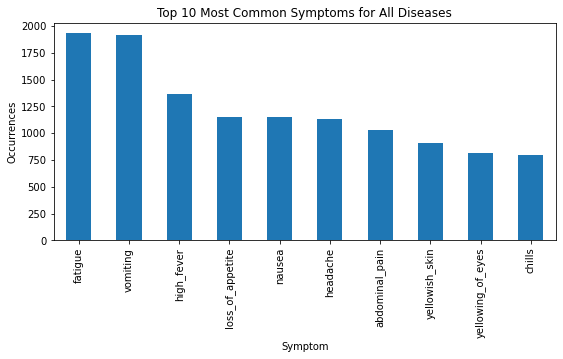

In [86]:
symptom_counts = my_df.drop("Disease", axis=1).sum(axis=0)

# Step 2: Sort the symptoms based on their frequency in descending order
sorted_symptoms = symptom_counts.sort_values(ascending=False)

# Step 3: Plot the top N most common symptoms in a bar chart
top_n = 10  # Change this value to show more or fewer symptoms
plt.figure(figsize=(9, 4))
sorted_symptoms.head(top_n).plot(kind='bar')
plt.title(f"Top {top_n} Most Common Symptoms for All Diseases")
plt.xlabel("Symptom")
plt.ylabel("Occurrences")
plt.show()


Enter symptoms you are experiencing (comma-separated): stomach_pain,back_pain,dizziness
Available symptoms in dataset: ['stomach_pain', 'back_pain', 'dizziness']
Filtered DataFrame shape: (0, 132)
No diseases found with all provided symptoms.
Please enter additional symptoms (comma-separated) or type 'exit' to stop: dizziness
Available symptoms in dataset: ['stomach_pain', 'back_pain', 'dizziness']
Filtered DataFrame shape: (684, 132)

Top predicted diseases based on combined symptoms:
               Diagnosis  Probability
11                Dengue     0.173251
7   Cervical spondylosis     0.172785
26        Hypothyroidism     0.165513
16                  GERD     0.163914
23          Hypertension     0.155491


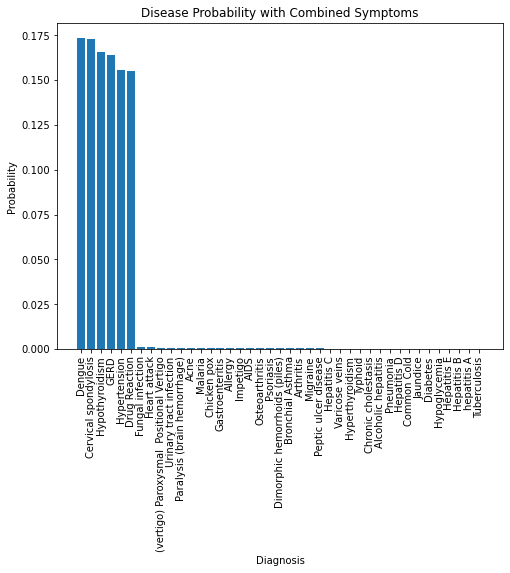

In [110]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from spellchecker import SpellChecker

# Load the pickled model
with open(f'{MY_PATH}trained_model_LR.pkl', 'rb') as f:
    clf_loaded = pickle.load(f)

# Get the list of symptom names from the dataset (excluding 'Disease' column)
symptoms_list = my_df.drop("Disease", axis=1).columns.tolist()

# Initialize SpellChecker instance
spell = SpellChecker()
def process_symptoms(symptoms_experiencing):
    user_input = {}
    no_match_found = True
    
    for user_symptom in symptoms_experiencing:
        # Check for exact match first
        if user_symptom in symptoms_list:
            user_input[user_symptom] = 1
            no_match_found = False
        else:
            # Find the best match using fuzzy matching
            best_match = max(symptoms_list, key=lambda x: fuzz.ratio(user_symptom.lower(), x.lower()))
            match_ratio = fuzz.ratio(user_symptom.lower(), best_match.lower())
            
            # Debugging line to show the matching process
            print(f"Processing '{user_symptom}' - Best match: '{best_match}' with score: {match_ratio}")
            
            if match_ratio >= 80:  # Set a threshold for similarity, adjust as needed
                print(f"Similarity score: {match_ratio}")
                correct_symptom = input(f"Did you mean '{best_match}' for '{user_symptom}'? (yes/no): ")
                if correct_symptom.lower() == 'yes':
                    user_input[best_match] = 1
                    no_match_found = False
                else:
                    user_input[user_symptom] = 0
            else:
                user_input[user_symptom] = 0

    # Preprocess user input to match the format used during training
    user_input_df = pd.DataFrame([user_input])

    if no_match_found:
        print("No matching symptoms found. Please try again with different symptoms.")
        return None, None

    return user_input_df, user_input



def filter_and_predict(symptoms_dict, match_all=True):
    available_symptoms = [symptom for symptom in symptoms_dict.keys() if symptom in my_df.columns]
    
    if not available_symptoms:
        print("No valid symptoms found in the dataset.")
        return None

    # Debugging: Print available symptoms
    print(f"Available symptoms in dataset: {available_symptoms}")

    if match_all:
        filtered_df = my_df[my_df[available_symptoms].eq(1).all(axis=1)]
    else:
        filtered_df = my_df[my_df[available_symptoms].eq(1).any(axis=1)]
    
    # Debugging: Print filtered DataFrame
    print(f"Filtered DataFrame shape: {filtered_df.shape}")
    if not filtered_df.empty:
        predicted_probabilities = clf_loaded.predict_proba(filtered_df.drop("Disease", axis=1))
        df_diagnoses_user_input = pd.DataFrame({
            'Diagnosis': clf_loaded.classes_,
            'Probability': predicted_probabilities.mean(axis=0)
        }).sort_values('Probability', ascending=False)
        return df_diagnoses_user_input
    return None
# Ask user to input symptoms they are experiencing as a comma-separated string
symptoms_str = input("Enter symptoms you are experiencing (comma-separated): ")

# Split the input string into individual symptom names
symptoms_experiencing = [s.strip() for s in symptoms_str.split(',')]

# Process initial symptoms
user_input_df, user_input = process_symptoms(symptoms_experiencing)

if user_input_df is None:
    # Handle no matching symptoms case
    print("Unable to process symptoms. Please provide different symptoms.")
else:
    # Proceed with predictions
    df_diagnoses_user_input = filter_and_predict(user_input)

    if df_diagnoses_user_input is None:
        all_symptoms = symptoms_experiencing  # Initialize with initial symptoms
        while True:
            print("No diseases found with all provided symptoms.")
            additional_symptoms_str = input("Please enter additional symptoms (comma-separated) or type 'exit' to stop: ")

            if additional_symptoms_str.lower() == 'exit':
                print("Edit was pressed. Thankyou!!")
                break

            additional_symptoms = [s.strip() for s in additional_symptoms_str.split(',')]

            # Combine all symptoms
            all_symptoms.extend(additional_symptoms)

            # Process all symptoms
            all_symptoms_df, all_user_input = process_symptoms(all_symptoms)

            if all_symptoms_df is None:
                # Handle no matching symptoms case
                print("Unable to process symptoms. Please provide different symptoms.")
                break

            # Try to predict with the combined symptoms
            df_diagnoses_user_input = filter_and_predict(all_user_input, match_all=False)

            if df_diagnoses_user_input is not None:
                print("\nTop predicted diseases based on combined symptoms:")
                print(df_diagnoses_user_input.head())

                plt.figure(figsize=(8, 6))
                plt.bar(df_diagnoses_user_input['Diagnosis'], df_diagnoses_user_input['Probability'])
                plt.xlabel('Diagnosis')
                plt.ylabel('Probability')
                plt.title('Disease Probability with Combined Symptoms')
                plt.xticks(rotation=90)
                plt.show()
                break
    else:
        print("\nTop predicted diseases based on user input symptoms:")
        print(df_diagnoses_user_input.head())

        plt.figure(figsize=(8, 6))
        plt.bar(df_diagnoses_user_input['Diagnosis'], df_diagnoses_user_input['Probability'])
        plt.xlabel('Diagnosis')
        plt.ylabel('Probability')
        plt.title('Disease Probability with Initial Symptoms')
        plt.xticks(rotation=90)
        plt.show()


 # Extract the disease with the highest probability
first_value = df_diagnoses_user_input.iloc[0]['Diagnosis']

In [88]:

        
# Display precautions for the top disease
print("\n\nPrecautions you can take for", first_value)

# Get the precautions for the disease
precautions_list = precautions[precautions["Disease"] == first_value].values.tolist()[0][1:]

# Display the precautions using bullet points
for i, precaution in enumerate(precautions_list, start=1):
    print(f"{i}. {precaution}")



Precautions you can take for Migraine
1. meditation
2. reduce stress
3. use poloroid glasses in sun
4. consult doctor


In [89]:
import textwrap

print("\n\nAccording to us the disease", first_value, "means the below \n")

# Get the description for the disease
description_text = descriptions[descriptions["Disease"] == first_value]["Description"].values[0]

# Wrap the text to fit within the console width
wrapped_text = textwrap.fill(description_text, width=80)

print(wrapped_text)




According to us the disease Migraine means the below 

A migraine can cause severe throbbing pain or a pulsing sensation, usually on
one side of the head. It's often accompanied by nausea, vomiting, and extreme
sensitivity to light and sound. Migraine attacks can last for hours to days, and
the pain can be so severe that it interferes with your daily activities.


In [90]:
print("\n\nPrecautions you can take for", first_value)

# Get the precautions for the disease
precautions_list = precautions[precautions["Disease"] == first_value].values.tolist()[0][1:]

# Display the precautions using bullet points
for i, precaution in enumerate(precautions_list, start=1):
    print(f"{i}. {precaution}")





Precautions you can take for Migraine
1. meditation
2. reduce stress
3. use poloroid glasses in sun
4. consult doctor
